# Set up environment

In [1]:
library(tidyverse)
options(repr.plot.width=3, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
dir()

[1] "camp_teach.csv"                      
[2] "gplot_theme.R"                       
[3] "Hypothesis 01.ipynb"                 
[4] "Hypothesis 02.ipynb"                 
[5] "Hypothesis 03.ipynb"                 
[6] "Output files.ipynb"                  
[7] "Project Summary and Hypothesis.ipynb"

In [3]:
source("gplot_theme.R")

# Read Data

In [4]:
dat_camp <- read_csv("camp_teach.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  TX = col_character(),
  TG = col_character(),
  GENDER = col_character(),
  ETHNIC = col_character(),
  hemog = col_double(),
  PREFEV = col_double(),
  PREFVC = col_double(),
  POSFEV = col_double(),
  POSFVC = col_double(),
  visitc = col_character()
)
See spec(...) for full column specifications.


# Preprocess

In [18]:
tmp <- dat_camp

# Treatment Group
tmp_map <-        c("bud", "ned", "plbo")
names(tmp_map) <- c("A",   "B",   "C")
tmp$TrtGrp <- tmp_map[tmp$TG]

# Exposed to Smoke
tmp1 <- ifelse(tmp$parent_smokes == 1, 1, 0)
tmp2 <- ifelse(tmp$any_smokes    == 1, 1, 0)
tmp$Expose_Smk <- ifelse((tmp1 + tmp2) > 0, "Exposed", "Not Exposed")

dat_camp_prep <- tmp

# -------------------------------

tmp <- dat_camp_prep

tmp <- tmp %>% filter(!is.na(PREFEV), !is.na(PREFEVPP))
tmp <- tmp %>% filter(visitc == "000")

dat_camp_base <- tmp

# ------------------------------

tmp <- dat_camp_prep

tmp <- tmp %>% filter(!is.na(PREFEV), !is.na(PREFEVPP))
tmp <- tmp %>% 
    group_by(id) %>%
    filter(visitc == max(visitc))

dat_camp_last <- tmp

In [20]:
tmp <- dat_camp_base

tmp <- tmp %>% select(id, Expose_Smk) %>% distinct
head(tmp)

id,Expose_Smk
1,Exposed
2,Exposed
4,Not Exposed
5,Not Exposed
9,Not Exposed
10,Not Exposed


In [6]:
colnames(dat_camp_prep)

[1] "TX"            "TG"            "id"            "age_rz"       
 [5] "GENDER"        "ETHNIC"        "hemog"         "PREFEV"       
 [9] "PREFVC"        "PREFF"         "PREPF"         "POSFEV"       
[13] "POSFVC"        "POSFF"         "POSPF"         "PREFEVPP"     
[17] "PREFVCPP"      "POSFEVPP"      "POSFVCPP"      "wbc"          
[21] "agehome"       "anypet"        "woodstove"     "dehumid"      
[25] "parent_smokes" "any_smokes"    "visitc"        "fdays"        
[29] "TrtGrp"        "Expose_Smk"

-----

# 

- (3) **The effects of treatment are different in children exposed to smoking compared to those not exposed to smoking**
    - a. as measured by difference in pre-bronchodilator FEV1PP  from baseline to last observation for each child and
    - b. as measured by change in FEV1PP after bronchodilator from baseline to last observation for each child.  

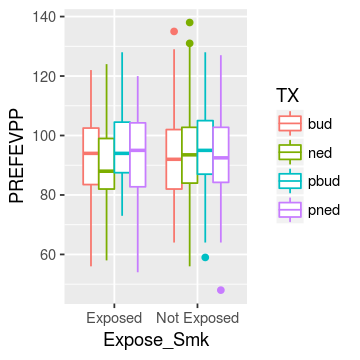

In [17]:
tmp <- dat_camp_base

gp <- ggplot(tmp, aes(x = Expose_Smk, y = PREFEVPP, color = TX)) + 
    geom_boxplot()
print(gp)

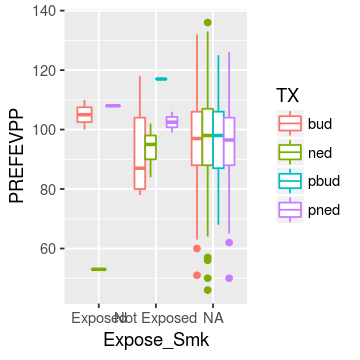

In [19]:
tmp <- dat_camp_last

gp <- ggplot(tmp, aes(x = Expose_Smk, y = PREFEVPP, color = TX)) + 
    geom_boxplot()
print(gp)

In [24]:
unique(dat_camp$TX)

[1] "ned"  "bud"  "pbud" "pned"

In [26]:
unique(dat_camp_prep$TrtGrp)

[1] "ned"  "bud"  "plbo"

Warning message:
“Removed 2 rows containing missing values (geom_path).”Warning message:
“Removed 7 rows containing missing values (geom_point).”

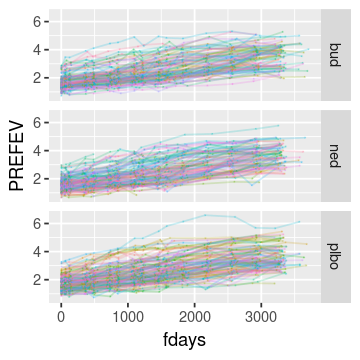

In [34]:
tmp <- dat_camp_prep %>% filter(id %in% c(1:500))
tmp$id <- as.character(tmp$id)

gp <- ggplot(tmp, aes(x = fdays, y = PREFEV, group = id, color = id)) +
    geom_line(alpha = 0.2) +
    geom_point(size = 0.01, alpha = 0.2) +
    theme(legend.position="none") +
    facet_grid(TrtGrp~.)
print(gp)